##  Installing dependencies and libraries:

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

### `generate_weights` Function

Generates random portfolio weights for `k` assets, ensuring they sum to 1, with an adjustment based on the leverage factor `l`:

- **Parameters:**
  - `l`: Leverage factor.
  - `k`: Number of assets.

- **Returns:**
  - A normalized array of portfolio weights, adjusted by `l`.


In [4]:
def generate_weights(l, k):
    a = np.random.rand(k)
    return a / a.sum() * (1 - l * k) + l

## Defining Asset Tickers:

### Multi-Asset Class (MAC) Portfolio:
The `mac_tickers` list includes a diversified selection of assets from multiple asset classes, such as equities, fixed income, real estate, commodities, and cash equivalents. This portfolio is designed to balance risk and return by including assets from various sectors and asset classes, which helps in mitigating the risks associated with individual market fluctuations.

### Benchmark Portfolio:
The `bench_tickers` list represents a traditional benchmark portfolio. It consists of major stocks from various sectors, typically including large-cap companies, to provide a point of comparison for assessing the performance of the MAC portfolio. This portfolio serves as a reference for measuring the effectiveness of diversification in the MAC portfolio.

### Defensive Portfolio:
The `def_tickers` list includes defensive assets that are typically less sensitive to economic cycles. These may include sectors like utilities, consumer staples, and healthcare, which tend to perform more consistently during periods of market stress. The defensive portfolio aims to preserve capital in volatile markets, offering lower risk and lower expected returns compared to the more aggressive MAC and benchmark portfolios.

### Key Differences:
- **MAC Portfolio:** A well-diversified set of assets across various asset classes, designed for a balanced risk-return profile.
- **Benchmark Portfolio:** A collection of major stocks, typically reflecting broad market trends, against which the performance of the MAC portfolio can be compared.
- **Defensive Portfolio:** Focuses on low-risk, non-cyclical assets that perform well in economic downturns, prioritizing capital preservation over higher returns.


In [6]:
# Defensive portfolio with mostly low to moderate risk assets
defense_tickers = [
    "TLT",   # Long-term Treasury Bonds (Fixed Income)
    "BND",   # Total Bond Market ETF (Fixed Income)
    "LQD",   # Investment Grade Corporate Bond ETF (Fixed Income)
    "VNQ",   # Vanguard Real Estate ETF (Real Estate)
    "IYR",   # U.S. Real Estate ETF (Real Estate)
    "SCHH",  # Schwab U.S. REIT ETF (Real Estate)
    "GLD",   # Gold ETF (Commodity - Gold)
    "DBC",   # Broad Basket Commodity ETF (Commodity)
    "AOA",   # Aggressive Allocation ETF (Diversified)
    "AOR",   # Moderate Allocation ETF (Diversified)
    "AOK",   # Conservative Allocation ETF (Diversified)
    "AGG"    # Aggregate Bond Market ETF (Fixed Income)
]

# Traditional equity-only portfolio with individual stocks, no index ETFs
ben_tickers = [
    "GOOG",  # Google LLC (Technology)
    "AAPL",  # Apple Inc. (Technology)
    "JNJ",   # Johnson & Johnson (Healthcare)
    "XOM",   # Exxon Mobil Corporation (Energy)
    "JPM",   # JPMorgan Chase & Co. (Financials)
    "V",     # Visa Inc. (Technology)
    "PFE",   # Pfizer Inc. (Healthcare)
    "WMT",   # Walmart Inc. (Consumer Staples)
    "NVDA",  # NVIDIA Corporation (Technology)
    "KO",    # The Coca-Cola Company (Consumer Staples)
    "CVX"    # Chevron Corporation (Energy)
]

mac_tickers = [
    "SPY",   # S&P 500 ETF (Index)
    "EEM",   # Emerging Markets ETF (Equity)
    "IAU",   # Gold ETF (Commodity - Gold)
    "REET",  # Global Real Estate ETF (Real Estate)
    "COMT",  # Commodity Index ETF (Commodity)
    "VNQ",   # Real Estate ETF (Real Estate)
    "BND",   # Total Bond Market ETF (Fixed Income)
    "GLD",   # Gold ETF (Commodity - Gold)
    "AAPL",  # Apple Inc. (Technology)
    "GOOG",  # Google LLC (Technology)
    "WMT",   # Walmart Inc. (Consumer Staples)
    "NVDA",  # NVIDIA Corporation (Technology)
    "LQD",   # Investment Grade Corporate Bond ETF (Fixed Income)
    "XOM",   # Exxon Mobil Corporation (Energy)
    "JPM"    # JPMorgan Chase & Co. (Financials)
]

### Downloading adjusted closing prices:

This section downloads the adjusted closing prices for both the MAC and Benchmark portfolios over the specified time period.

- **Start Date:** "2011-01-01"
- **End Date:** "2022-01-01"

- **mac_tickers:** List of tickers for the MAC portfolio.
- **bench_tickers:** List of tickers for the Benchmark portfolio.
- **defense_tickers:** List of tickers for the Defensive portfolio.

The adjusted close prices are fetched using the `yfinance` library and stored in `adj_pr_mac`, `adj_pr_ben` and `adj_pr_def`. Any missing data is removed using `.dropna()`.

- **Output:** Displays the adjusted close price data for both portfolios.

In [8]:
start_date = "2011-01-01"
end_date = "2022-01-01"

adj_pr_mac = yf.download(mac_tickers, start = start_date, end = end_date)["Adj Close"].dropna()
adj_pr_ben = yf.download(ben_tickers, start = start_date, end = end_date)["Adj Close"].dropna()
adj_pr_def = yf.download(defense_tickers, start = start_date, end = end_date)["Adj Close"].dropna()

display(adj_pr_ben, adj_pr_mac, adj_pr_def)

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  12 of 12 completed


Ticker,AAPL,CVX,GOOG,JNJ,JPM,KO,NVDA,PFE,V,WMT,XOM
Date,,,,,,,,,,,
2011-01-03,9.928850,52.596664,14.998439,41.885059,29.612455,21.170364,0.362707,9.605148,15.935622,13.466926,43.483616
2011-01-04,9.980672,52.402149,14.943096,42.238430,30.041033,20.732145,0.361561,9.773562,15.953692,13.518771,43.687759
2011-01-05,10.062315,52.310612,15.115579,42.211769,30.408384,20.608795,0.389303,9.838756,16.290394,13.429908,43.571106
2011-01-06,10.054180,51.881546,15.225519,42.145092,30.258722,20.459486,0.443181,9.876784,16.534449,13.318835,43.851082
2011-01-07,10.126182,52.167610,15.298481,41.738388,29.687296,20.423773,0.455562,9.963710,16.486998,13.348453,44.090244
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,177.423660,105.768356,147.533890,155.533157,144.663315,53.585857,30.893618,50.848942,212.668823,44.960949,55.664383
2021-12-28,176.400436,105.563560,145.923676,156.156525,145.102371,53.795994,30.271650,49.826813,213.079254,45.606178,55.484497
2021-12-29,176.488983,105.020439,145.979980,157.256500,145.029175,53.859955,29.951187,49.457474,213.196487,45.583813,54.998817


Ticker,AAPL,BND,COMT,EEM,GLD,GOOG,IAU,JPM,LQD,NVDA,REET,SPY,VNQ,WMT,XOM
Date,,,,,,,,,,,,,,,
2014-10-16,21.344006,62.472813,23.970995,31.832626,119.220001,26.060057,24.000000,41.569096,85.156006,0.417055,16.437559,155.636597,49.398354,20.033031,58.180103
2014-10-17,21.656649,62.427605,24.142183,32.188351,118.989998,25.397268,23.980000,42.414356,85.120506,0.416338,16.495609,157.474686,49.457977,20.109016,58.571835
2014-10-20,22.120071,62.480354,24.037567,32.283195,119.800003,25.877716,24.139999,42.738895,85.276611,0.419923,16.677876,159.003799,50.213039,20.391249,58.931427
2014-10-21,22.720970,62.389984,24.265820,32.417583,120.019997,26.160917,24.160000,43.719990,85.226921,0.437848,16.829081,162.153748,50.670082,20.630054,60.138725
2014-10-22,22.836266,62.374912,24.265820,32.204155,119.339996,26.467472,24.059999,43.357727,85.085014,0.427571,16.815584,161.000702,50.683315,20.632771,59.804802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,177.423660,77.373779,21.506048,45.436211,169.369995,147.533890,34.480000,144.663315,118.473824,30.893618,27.454071,456.750916,101.246819,44.960949,55.664383
2021-12-28,176.400436,77.364647,21.499117,45.287666,168.639999,145.923676,34.340000,145.102371,118.322487,30.271650,27.517872,456.377747,101.619843,45.606178,55.484497
2021-12-29,176.488983,77.109390,21.623871,45.083420,168.589996,145.979980,34.330002,145.029175,117.672630,29.951187,27.691051,456.961517,102.303711,45.583813,54.998817


Ticker,AGG,AOA,AOK,AOR,BND,DBC,GLD,IYR,LQD,SCHH,TLT,VNQ
Date,,,,,,,,,,,,
2011-01-13,73.129539,25.118822,20.916647,22.866926,54.469681,24.372837,134.050003,34.927731,67.203888,8.652567,63.529037,31.859402
2011-01-14,72.977684,25.262808,20.952810,22.960230,54.395195,24.486446,132.690002,35.164669,66.884575,8.731664,63.123474,32.072556
2011-01-18,72.929398,25.363592,20.952810,22.974583,54.340992,24.460228,133.429993,35.495125,66.847740,8.797004,62.827950,32.349098
2011-01-19,72.943207,25.054022,20.923874,22.845398,54.408680,24.434010,133.720001,35.071140,66.798645,8.683517,63.281620,31.922773
2011-01-20,72.667122,24.917231,20.822653,22.737741,54.205555,24.189322,131.199997,34.996319,66.510048,8.693837,62.408695,31.928534
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,103.919952,68.308884,36.841408,53.190971,77.373779,18.815935,169.369995,105.234222,118.473824,23.662043,135.025467,101.246819
2021-12-28,103.874474,68.262131,36.786255,53.190971,77.364647,18.779959,168.639999,105.593330,118.322487,23.757908,134.490387,101.619843
2021-12-29,103.565224,68.224731,36.694321,53.135216,77.109390,18.869902,168.589996,106.283897,117.672630,23.922262,133.021179,102.303711


### Aligning Portfolio Data

To ensure both the MAC and Benchmark portfolios are aligned in terms of dates, we find the common dates between both datasets using `.intersection()`. The portfolios are then filtered to only include these common dates.

- **Output:** The shape of the aligned Benchmark, defensive and MAC portfolios is displayed to confirm the alignment.

In [10]:
common_dates = adj_pr_ben.index.intersection(adj_pr_mac.index).intersection(adj_pr_def.index)

# Align all datasets to the common dates
adj_pr_ben = adj_pr_ben.loc[common_dates]
adj_pr_mac = adj_pr_mac.loc[common_dates]
adj_pr_def = adj_pr_def.loc[common_dates]

# Print the shapes to verify alignment
print("Aligned Benchmark portfolio shape:", adj_pr_ben.shape)
print("Aligned MAC portfolio shape:", adj_pr_mac.shape)
print("Aligned Defensive portfolio shape:", adj_pr_def.shape)


Aligned Benchmark portfolio shape: (1816, 11)
Aligned MAC portfolio shape: (1816, 15)
Aligned Defensive portfolio shape: (1816, 12)


## Plotting logarithms (for a better sense of scale) of adjusted closing price of each stock:

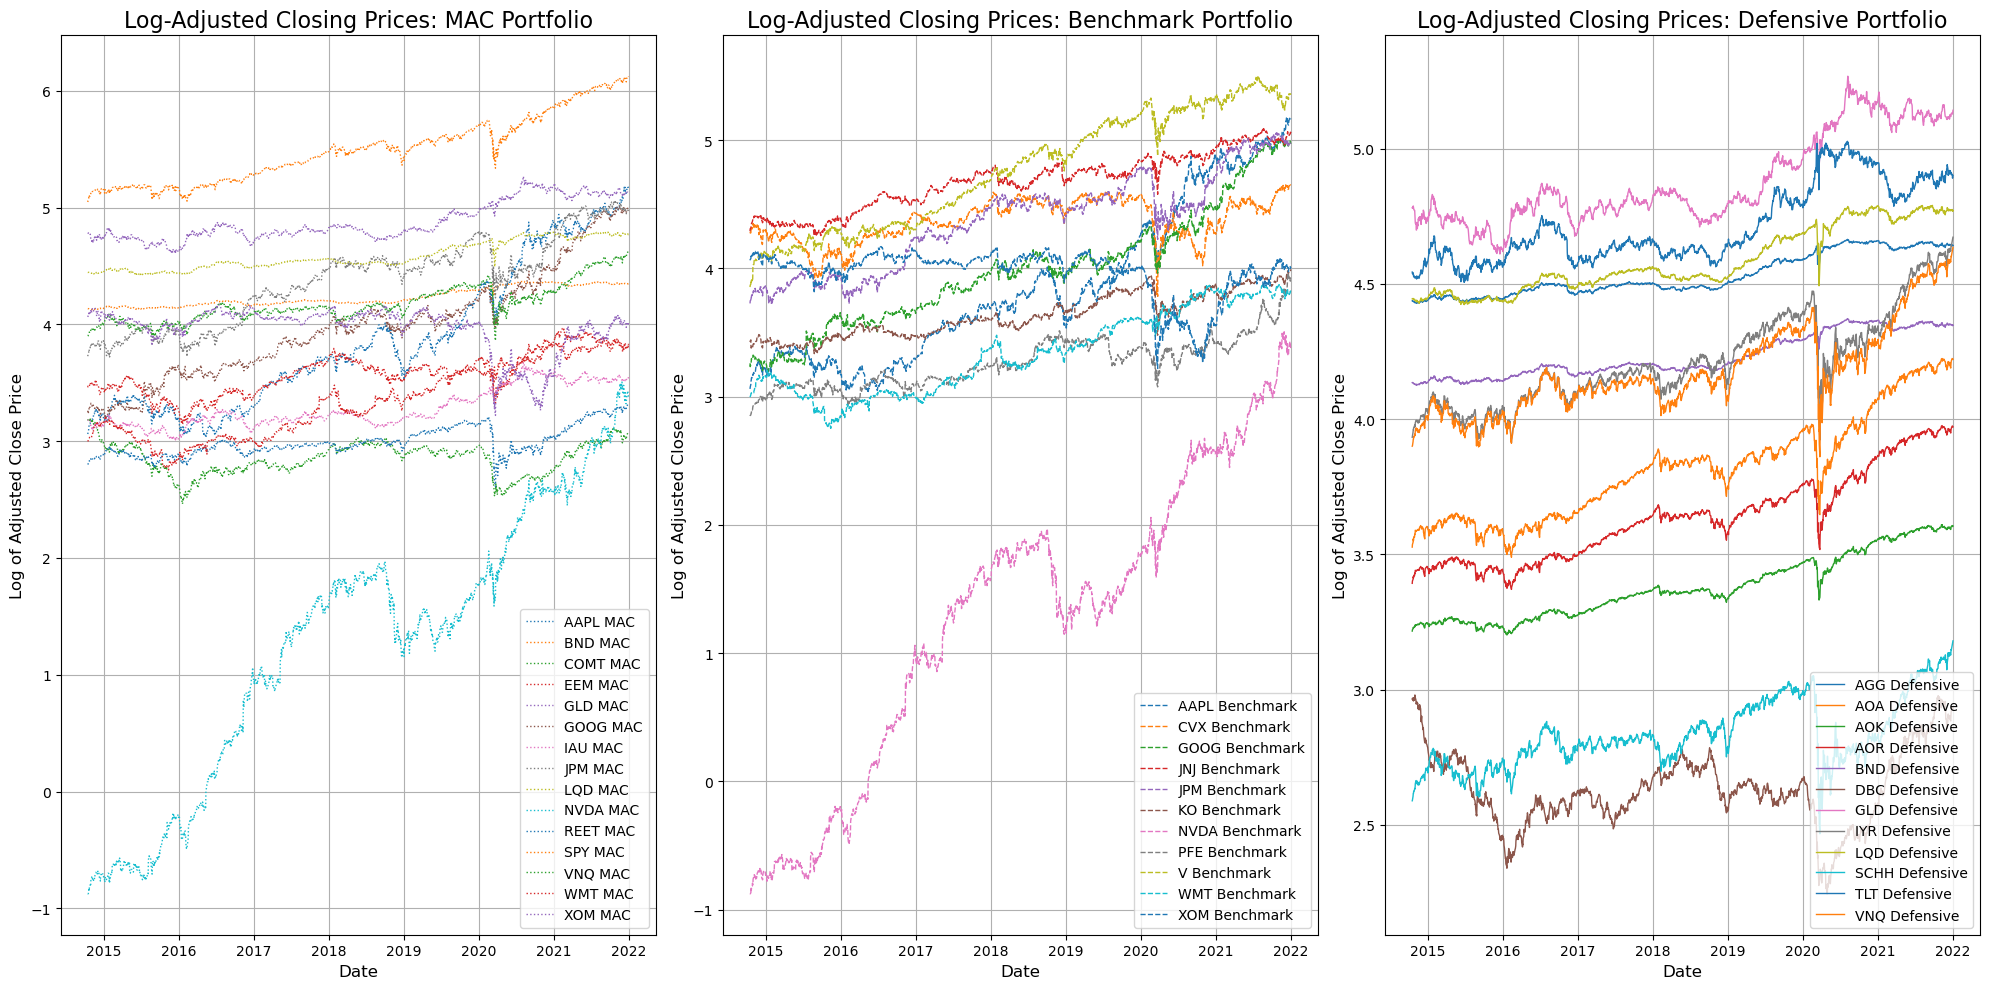

In [12]:
def priceplotter(adj_pr_mac, adj_pr_ben, adj_pr_def):
    
    plt.figure(figsize = (20, 10))

    """*************************************************************************"""
    plt.subplot(1, 3, 1)
    for stock in adj_pr_mac.columns:
        plt.plot(adj_pr_mac.index, np.log(adj_pr_mac[stock]), 
                 label = f"{stock} MAC", linestyle = ":", linewidth = 1)
        
    plt.title("Log-Adjusted Closing Prices: MAC Portfolio", fontsize=16)
    plt.xlabel("Date", fontsize = 12)
    plt.ylabel("Log of Adjusted Close Price", fontsize = 12)
    plt.legend()
    plt.grid(True)
    """***************************************************************************"""
    plt.subplot(1, 3, 2)
    for stock in adj_pr_ben.columns:
        plt.plot(adj_pr_ben.index, np.log(adj_pr_ben[stock]), 
                 label = f"{stock} Benchmark", linestyle = "--", linewidth=1)
        
    plt.title("Log-Adjusted Closing Prices: Benchmark Portfolio", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Log of Adjusted Close Price", fontsize = 12)
    plt.legend()
    plt.grid(True)
    """***************************************************************************"""
    plt.subplot(1, 3, 3)
    for stock in adj_pr_def.columns:
        plt.plot(adj_pr_def.index, np.log(adj_pr_def[stock]), 
                 label=f"{stock} Defensive", linestyle = "-", linewidth=1)
        
    plt.title("Log-Adjusted Closing Prices: Defensive Portfolio", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Log of Adjusted Close Price", fontsize=12)
    plt.legend()
    plt.grid(True)
    """***************************************************************************"""
    
    plt.tight_layout()
    plt.show()

priceplotter(adj_pr_mac, adj_pr_ben, adj_pr_def)

## Summary Statistics for MAC, Benchmark, and Defensive Portfolios:

This section calculates key statistics for the MAC, Benchmark, and Defensive portfolios. The results are summarized below:

1. **Percentage Change in Daily Returns**: This is calculated using the percentage change of the adjusted closing prices for each portfolio.
2. **Expected Return**: The average of daily returns for each portfolio, providing an estimate of the portfolio's expected performance.
3. **Standard Deviation**: Measures the volatility of returns for each portfolio. A higher standard deviation indicates higher risk.
4. **Variance**: The squared standard deviation of daily returns, showing the extent of variability in portfolio returns.
5. **Excess Returns**: The deviation of daily returns from their respective expected returns. This shows how much a portfolio outperforms or underperforms its expected return.
6. **Covariance Matrices**: Measures the covariance between assets in each portfolio, reflecting the degree to which two assets move together.

### Covariance Matrices
- Covariance values for daily returns between different assets in the MAC, Benchmark, and Defensive portfolios are displayed below. These values help assess how the assets in each portfolio interact with each other in terms of risk and correlation.

The three portfolios differ in their composition and risk profiles:
- **MAC Portfolio**: A diversified portfolio across multiple asset classes, aimed at achieving a balanced risk-return profile.
- **Benchmark Portfolio**: Composed of major stocks from various sectors, providing a point of comparison for performance.
- **Defensive Portfolio**: Focuses on low-risk, non-cyclical assets, designed for capital preservation during market downturns.


In [14]:
import pandas as pd

# Calculate percentage change in daily returns
daily_returns_mac = adj_pr_mac.pct_change().dropna()
daily_returns_ben = adj_pr_ben.pct_change().dropna()
daily_returns_def = adj_pr_def.pct_change().dropna()

# Calculate expected returns (mean of daily returns)
expected_return_mac = daily_returns_mac.mean()
expected_return_ben = daily_returns_ben.mean()
expected_return_def = daily_returns_def.mean()

# Calculate standard deviations
std_deviation_mac = daily_returns_mac.std()
std_deviation_ben = daily_returns_ben.std()
std_deviation_def = daily_returns_def.std()

# Calculate variances
variance_mac = daily_returns_mac.var()
variance_ben = daily_returns_ben.var()
variance_def = daily_returns_def.var()

# Calculate excess returns over mean returns
xs_mac = daily_returns_mac.sub(expected_return_mac, axis=1)
xs_ben = daily_returns_ben.sub(expected_return_ben, axis=1)
xs_def = daily_returns_def.sub(expected_return_def, axis=1)

# Calculate covariance matrices
cov_mac = daily_returns_mac.cov()
cov_ben = daily_returns_ben.cov()
cov_def = daily_returns_def.cov()

# Create summary DataFrames
summary_stats_mac = pd.DataFrame({
    "Expected Return": expected_return_mac,
    "Standard Deviation": std_deviation_mac,
    "Variance": variance_mac
}).round(4)

summary_stats_ben = pd.DataFrame({
    "Expected Return": expected_return_ben,
    "Standard Deviation": std_deviation_ben,
    "Variance": variance_ben
}).round(4)

summary_stats_def = pd.DataFrame({
    "Expected Return": expected_return_def,
    "Standard Deviation": std_deviation_def,
    "Variance": variance_def
}).round(4)

# Display results
display(summary_stats_mac.head(), summary_stats_ben.head(), summary_stats_def.head())

print("\n" + "*" * 100 + "\n")

print("MAC Portfolio Covariance Matrix:")
display(cov_mac)

print("\nBenchmark Portfolio Covariance Matrix:")
display(cov_ben)

print("\nDefensive Portfolio Covariance Matrix:")
display(cov_def)

,Expected Return,Standard Deviation,Variance
Ticker,,,
AAPL,0.0013,0.0182,0.0003
BND,0.0001,0.0029,0.0000
COMT,0.0000,0.0114,0.0001
EEM,0.0003,0.0135,0.0002
GLD,0.0002,0.0089,0.0001


,Expected Return,Standard Deviation,Variance
Ticker,,,
AAPL,0.0013,0.0182,0.0003
CVX,0.0004,0.0195,0.0004
GOOG,0.0011,0.0166,0.0003
JNJ,0.0005,0.0117,0.0001
JPM,0.0008,0.0177,0.0003


,Expected Return,Standard Deviation,Variance
Ticker,,,
AGG,0.0001,0.0027,0.0000
AOA,0.0004,0.0084,0.0001
AOK,0.0002,0.0037,0.0000
AOR,0.0003,0.0064,0.0000
BND,0.0001,0.0029,0.0000



****************************************************************************************************

MAC Portfolio Covariance Matrix:


Ticker,AAPL,BND,COMT,EEM,GLD,GOOG,IAU,JPM,LQD,NVDA,REET,SPY,VNQ,WMT,XOM
Ticker,,,,,,,,,,,,,,,
AAPL,3.295998e-04,1.068871e-06,0.000061,0.000141,5.749818e-07,1.796092e-04,5.541041e-07,0.000141,0.000013,0.000277,0.000095,1.473650e-04,0.000108,0.000082,0.000113
BND,1.068871e-06,8.337924e-06,-0.000002,0.000002,8.429797e-06,1.421089e-06,8.459565e-06,-0.000006,0.000012,0.000002,0.000006,6.974031e-07,0.000007,0.000001,-0.000003
COMT,6.148583e-05,-2.039286e-06,0.000129,0.000083,1.378571e-05,5.101888e-05,1.407153e-05,0.000081,0.000003,0.000076,0.000051,5.950887e-05,0.000046,0.000020,0.000113
EEM,1.412633e-04,2.019697e-06,0.000083,0.000181,1.104754e-05,1.283560e-04,1.113406e-05,0.000142,0.000012,0.000190,0.000099,1.166683e-04,0.000099,0.000057,0.000130
GLD,5.749818e-07,8.429797e-06,0.000014,0.000011,7.977812e-05,-6.396973e-08,7.941060e-05,-0.000027,0.000014,-0.000003,0.000012,-6.161115e-07,0.000011,0.000003,-0.000003
GOOG,1.796092e-04,1.421089e-06,0.000051,0.000128,-6.396973e-08,2.743819e-04,-1.812471e-07,0.000132,0.000012,0.000238,0.000089,1.319715e-04,0.000097,0.000065,0.000113
IAU,5.541041e-07,8.459565e-06,0.000014,0.000011,7.941060e-05,-1.812471e-07,7.964355e-05,-0.000027,0.000014,-0.000004,0.000012,-7.552521e-07,0.000011,0.000003,-0.000003
JPM,1.411678e-04,-5.809007e-06,0.000081,0.000142,-2.656591e-05,1.316856e-04,-2.656565e-05,0.000313,0.000004,0.000171,0.000126,1.494241e-04,0.000131,0.000066,0.000201
LQD,1.296296e-05,1.173281e-05,0.000003,0.000012,1.403314e-05,1.164799e-05,1.400049e-05,0.000004,0.000025,0.000018,0.000021,1.054164e-05,0.000021,0.000003,0.000005



Benchmark Portfolio Covariance Matrix:


Ticker,AAPL,CVX,GOOG,JNJ,JPM,KO,NVDA,PFE,V,WMT,XOM
Ticker,,,,,,,,,,,
AAPL,0.000330,0.000132,0.000180,0.000086,0.000141,0.000078,0.000277,0.000086,0.000164,0.000082,0.000113
CVX,0.000132,0.000381,0.000129,0.000095,0.000232,0.000108,0.000172,0.000093,0.000170,0.000056,0.000286
GOOG,0.000180,0.000129,0.000274,0.000079,0.000132,0.000076,0.000238,0.000081,0.000162,0.000065,0.000113
JNJ,0.000086,0.000095,0.000079,0.000138,0.000092,0.000072,0.000093,0.000091,0.000091,0.000064,0.000082
JPM,0.000141,0.000232,0.000132,0.000092,0.000313,0.000103,0.000171,0.000104,0.000171,0.000066,0.000201
KO,0.000078,0.000108,0.000076,0.000072,0.000103,0.000139,0.000081,0.000068,0.000095,0.000057,0.000096
NVDA,0.000277,0.000172,0.000238,0.000093,0.000171,0.000081,0.000805,0.000093,0.000221,0.000097,0.000137
PFE,0.000086,0.000093,0.000081,0.000091,0.000104,0.000068,0.000093,0.000200,0.000094,0.000060,0.000084
V,0.000164,0.000170,0.000162,0.000091,0.000171,0.000095,0.000221,0.000094,0.000256,0.000067,0.000141



Defensive Portfolio Covariance Matrix:


Ticker,AGG,AOA,AOK,AOR,BND,DBC,GLD,IYR,LQD,SCHH,TLT,VNQ
Ticker,,,,,,,,,,,,
AGG,7.353434e-06,0.000002,3.884807e-06,0.000002,7.167564e-06,-6.670368e-07,0.000008,0.000006,0.000010,0.000006,1.837139e-05,0.000006
AOA,1.893431e-06,0.000071,2.754496e-05,0.000053,2.447338e-06,4.329098e-05,0.000003,0.000078,0.000011,0.000079,-2.379690e-05,0.000079
AOK,3.884807e-06,0.000028,1.382613e-05,0.000021,4.241415e-06,1.579188e-05,0.000006,0.000034,0.000010,0.000034,6.790620e-07,0.000034
AOR,1.942437e-06,0.000053,2.145152e-05,0.000041,2.443405e-06,3.242160e-05,0.000005,0.000061,0.000010,0.000061,-1.512104e-05,0.000061
BND,7.167564e-06,0.000002,4.241415e-06,0.000002,8.337924e-06,-9.729562e-07,0.000008,0.000007,0.000012,0.000007,1.779460e-05,0.000007
DBC,-6.670368e-07,0.000043,1.579188e-05,0.000032,-9.729562e-07,1.164484e-04,0.000019,0.000039,0.000004,0.000039,-2.318530e-05,0.000039
GLD,8.323120e-06,0.000003,6.075970e-06,0.000005,8.429797e-06,1.865113e-05,0.000080,0.000010,0.000014,0.000009,2.380635e-05,0.000011
IYR,5.857776e-06,0.000078,3.371790e-05,0.000061,7.237599e-06,3.900501e-05,0.000010,0.000160,0.000021,0.000166,-1.616488e-05,0.000164
LQD,1.047851e-05,0.000011,9.705454e-06,0.000010,1.173281e-05,4.070167e-06,0.000014,0.000021,0.000025,0.000021,2.452524e-05,0.000021


### Efficient Frontier Visualization

This section of the code focuses solely on plotting the **Efficient Frontier** for a given portfolio. The **Efficient Frontier** is a crucial concept in portfolio optimization, representing the set of optimal portfolios that offer the maximum expected return for a given level of risk.

### **Steps:**

1. **Covariance Matrix and Mean Returns Calculation:**
   - The **covariance matrix** is computed to understand the relationships and risk between the assets in the portfolio.
   - The **mean returns** of the assets are calculated to determine the expected performance of each asset.

2. **Efficient Frontier Calculation:**
   - The **Efficient Frontier** is derived using **mean-variance optimization**. This involves calculating a range of expected returns and the corresponding risk for each portfolio.
   - The portfolios on the Efficient Frontier are those that give the highest return for each level of risk.

3. **Plotting the Efficient Frontier:**
   - Only the Efficient Frontier is plotted in this section, with a **color-coded line** for different portfolios:
     - **Red line**: MAC Portfolio Efficient Frontier
     - **Blue line**: Benchmark Portfolio Efficient Frontier
     - **Green line**: Defensive Portfolio Efficient Frontier
   - The **risk** (standard deviation) is plotted on the x-axis, and the **expected return** is plotted on the y-axis.

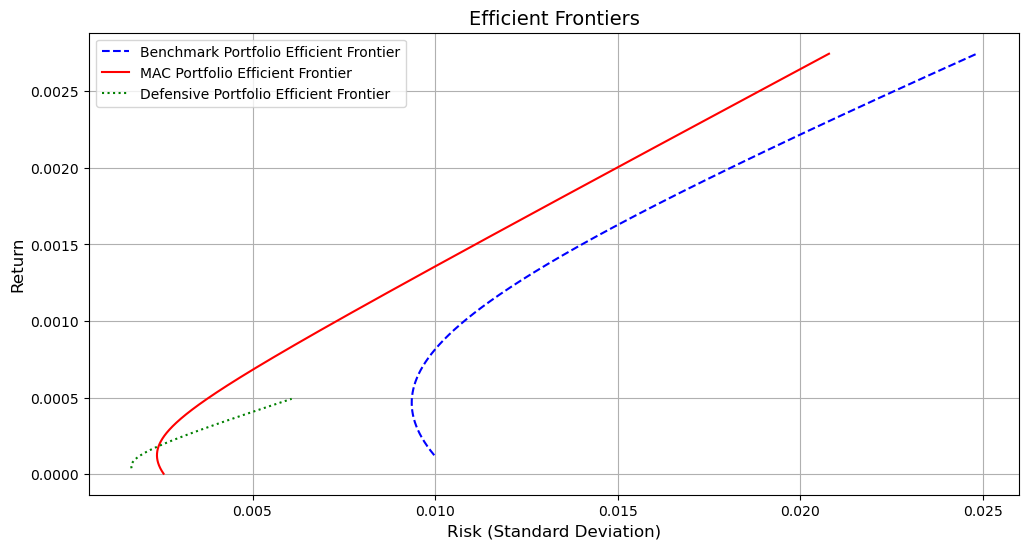

In [16]:
def efficient_frontier_only(df, num_portfolios=10000):
    """Plots only the efficient frontier for a given portfolio."""
    cov_matrix = df.cov()
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    mean_returns = df.mean().values
    n_assets = len(mean_returns)

    mu_range = np.linspace(mean_returns.min(), mean_returns.max(), 10000)
    e = np.ones(n_assets)
    a = mean_returns.T @ inv_cov_matrix @ mean_returns
    c = mean_returns.T @ inv_cov_matrix @ e
    f = e.T @ inv_cov_matrix @ e

    efficient_risk, efficient_return = [], []

    for mu_0 in mu_range:
        lambda_1 = ((f * mu_0) - c) / ((a * f) - c**2)
        lambda_2 = (a - (c * mu_0)) / ((a * f) - c**2)
        weights = lambda_1 * (inv_cov_matrix @ mean_returns) + lambda_2 * (inv_cov_matrix @ e)
        portfolio_variance = weights.T @ cov_matrix @ weights
        portfolio_risk = np.sqrt(portfolio_variance)
        efficient_risk.append(portfolio_risk)
        efficient_return.append(mu_0)

    # Plotting only the efficient frontier
    label = ""
    color = ""
    linestyle = ""

    if df is daily_returns_mac:
        label = "MAC Portfolio Efficient Frontier"
        color = "red"
        linestyle = "-"
    elif df is daily_returns_ben:
        label = "Benchmark Portfolio Efficient Frontier"
        color = "blue"
        linestyle = "--"
    else:
        label = "Defensive Portfolio Efficient Frontier"
        color = "green"
        linestyle = ":"

    plt.plot(efficient_risk, efficient_return, color=color, linestyle=linestyle, linewidth=1.5, label=label)

# Plotting efficient frontiers only
plt.figure(figsize = (12, 6))

efficient_frontier_only(daily_returns_ben)
efficient_frontier_only(daily_returns_mac)
efficient_frontier_only(daily_returns_def)

plt.title("Efficient Frontiers", fontsize = 14)
plt.xlabel("Risk (Standard Deviation)", fontsize = 12)
plt.ylabel("Return", fontsize = 12)

plt.legend()
plt.grid(True)
plt.show()

### Scatter Plot of Random Portfolios

This code is a Monte Carlo simulation that generates a **scatter plot** of random portfolios for a given dataset. The plot shows the relationship between portfolio **risk** (standard deviation) and **return**, based on randomly generated asset allocations.

### **Key Steps:**

1. **Covariance Matrix and Mean Returns Calculation:**
   - The **covariance matrix** is calculated to understand the correlation and risk between the assets in the portfolio.
   - The **mean returns** of the assets are calculated to determine their expected performance.

2. **Random Portfolio Generation:**
   - A specified number of random portfolios (`num_portfolios`) are generated by assigning random weights to the assets. For each portfolio:
     - The expected **portfolio return** is calculated as the weighted sum of individual asset returns.
     - The **portfolio risk** is calculated based on the variance (risk) of the portfolio's returns, using the covariance matrix.

3. **Scatter Plot Visualization:**
   - The random portfolios are plotted as **scatter points**, where:
     - The **x-axis** represents **portfolio risk** (standard deviation).
     - The **y-axis** represents **portfolio return**.
   - The color of the scatter points is based on the **return**, using different color maps for different portfolio types:
     - **Red shades**: MAC Portfolios
     - **Blue shades**: Benchmark Portfolios
     - **Green shades**: Defensive Portfolios

4. **Visualization Settings:**
   - The plot includes axis labels for **risk** and **return**, as well as a grid for easier interpretation.
   - A legend is added to differentiate between the different portfolio types.

### **Understanding the Results:**

- The scatter plot shows the distribution of **random portfolios**, each with a specific **risk-return** profile.
- Different color maps are used to distinguish between the portfolios of different types (MAC, Benchmark, and Defensive).
- This visualization helps in understanding the variety of portfolio combinations and gives an overview of the risk-return tradeoff for each portfolio.


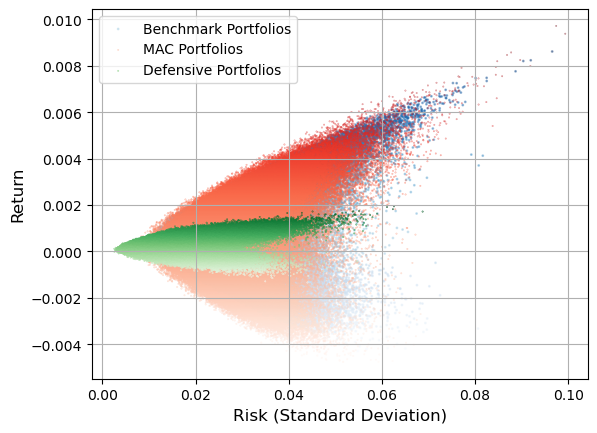

In [18]:
def scatter_portfolios(df, num_portfolios = 250000):
    """Generates a scatter plot of random portfolios."""
    cov_matrix = df.cov()
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    mean_returns = df.mean().values
    n_assets = len(mean_returns)

    random_risk, random_return = [], []

    for _ in range(num_portfolios):
        weights = generate_weights(-1, n_assets)
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_variance = weights.T @ cov_matrix @ weights
        portfolio_risk = np.sqrt(portfolio_variance)
        random_risk.append(portfolio_risk)
        random_return.append(portfolio_return)

    # Scatter plot based on portfolio type
    if df is daily_returns_mac:
        plt.scatter(random_risk, random_return, 
                    c = random_return, cmap = "Reds", s = 0.1, alpha = 0.6, label = "MAC Portfolios")
    elif df is daily_returns_ben:
        plt.scatter(random_risk, random_return, 
                    c = random_return, cmap = "Blues", s = 1, alpha = 0.4, label = "Benchmark Portfolios")
    else:
        plt.scatter(random_risk, random_return, 
                    c = random_return, cmap = "Greens", s = 0.1, alpha = 1, label = "Defensive Portfolios")

    plt.xlabel("Risk (Standard Deviation)", fontsize = 12)
    plt.ylabel("Return", fontsize = 12)
    plt.grid(True)
    plt.legend()
scatter_portfolios(daily_returns_ben)
scatter_portfolios(daily_returns_mac)
scatter_portfolios(daily_returns_def)